In [634]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [635]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')

In [636]:
with open('data_description.txt', encoding='utf8') as f:
    for line in f:
        print(line.strip())

MSSubClass: Identifies the type of dwelling involved in the sale.

20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Grvl	Gravel
Pave	Pave

In [637]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [638]:
# Data cleaning and preparation
train.isnull().sum()[train.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<AxesSubplot:>

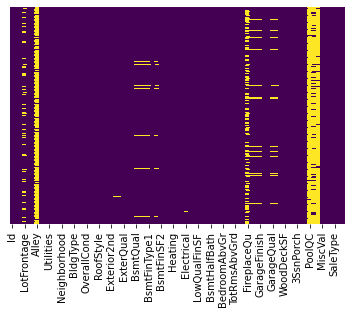

In [639]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [640]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [641]:
test.isnull().sum()[test.isnull().sum()!=0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

<AxesSubplot:>

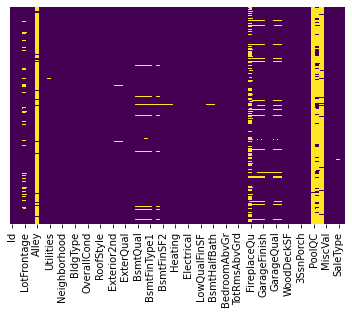

In [642]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [643]:
train.shape

(1460, 81)

In [644]:
features=train.columns
total_houses=train.shape[0]

full=pd.DataFrame()     # columns with no missing values
remove=pd.DataFrame()    # columns with >50% missing values which we have to remove
missome=pd.DataFrame()    # columns with some missing values

for feature in features:   # drop columns with more than 50% of missing data
    if train[feature].count() == total_houses:
        full[feature]=train[feature]
    elif train[feature].count() >0.5*total_houses:
        missome[feature]=train[feature]
    else:
        remove[feature]=train[feature]        

In [645]:
remove.head(3)

,Alley,PoolQC,Fence,MiscFeature
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [646]:
print('Number of Numerical feature: ',end=' ')
print(len(train.select_dtypes(include=['number']).columns))        
print('Numerical features:')
print(train.select_dtypes(include=['number']).columns.values)

Number of Numerical feature:  38
Numerical features:
['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [647]:
print('Number of Categorical feature: ',end=' ')
print(len(train.select_dtypes(include=['O']).columns))        # Return a subset of the DataFrame's columns based on the column dtypes
print('Categorical  features:')
print(train.select_dtypes(include=['O']).columns.values) 

Number of Categorical feature:  43
Categorical  features:
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


In [648]:
train.drop(['Id'],axis=1,inplace=True)
train.drop(columns=remove,axis=1,inplace=True)

train_num=train.select_dtypes(include='number')  # Selecting quantitaive features

train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [649]:
train_cat=train.select_dtypes(include='O')      # Selecting Categorical features  

from sklearn.preprocessing import LabelEncoder  # Change caterogical data in train into numarical

le=LabelEncoder()

for ft in train_cat.columns.values:
    train_cat[ft]=le.fit_transform(train_cat[ft])
    train[ft]=le.fit_transform(train[ft])
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [650]:
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    train[col] = train[col].fillna('NoGRG')
    
# NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('NoBSMT')

#Fill other missing values based on mean values 
train.fillna(train.mean(), inplace=True)

In [651]:
train.isnull().any().sum()

0

In [652]:
train_corr = train.corr()['SalePrice'][:-1] 
fs= train_corr[abs(train_corr) > 0.4].sort_values(ascending=False)   #use corr>0.4 to choose the top 10 features
print("These are the top {} features to choose:\n{}".format(len(fs), fs))

These are the top 20 features to choose:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
HeatingQC      -0.400178
GarageType     -0.415283
FireplaceQu    -0.459605
GarageFinish   -0.549247
KitchenQual    -0.589189
BsmtQual       -0.620886
ExterQual      -0.636884
Name: SalePrice, dtype: float64


In [653]:
# Handling outliers
for c in train:
    Q1 = train[c].quantile(0.25)
    Q3 = train[c].quantile(0.75)
    IQR = Q3 - Q1
    train[(train[c] < (Q3 + 1.5 * IQR)) & (train[c] > (Q1 - 1.5 * IQR))]

In [654]:
# Filter noisy data 
from scipy.signal import savgol_filter

for i in train:
    train[i]=savgol_filter(train[i],21,5)

In [655]:
train_corr = train.corr()['SalePrice'][:-1] 
fs= train_corr[abs(train_corr) > 0.55].sort_values(ascending=False)   #use corr>0.55 to choose the top 10 features
print("The top {} features to choose:\n{}".format(len(fs), fs))

The top 10 features to choose:
OverallQual    0.794501
GrLivArea      0.732706
GarageCars     0.677545
GarageArea     0.660298
1stFlrSF       0.627683
TotalBsmtSF    0.618830
FullBath       0.595804
KitchenQual   -0.572069
ExterQual     -0.579645
BsmtQual      -0.614854
Name: SalePrice, dtype: float64


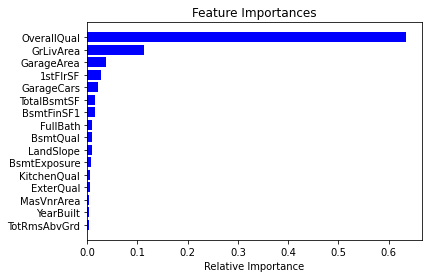

In [656]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 

X = train.drop(columns=['SalePrice'])
y = train['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101)

model = RandomForestRegressor(max_depth=6, random_state=101, n_estimators=100)
model.fit(X_train, y_train)

features = train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-16:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [657]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler


X = train.loc[:,fs.index].values
y = train.loc[:,['SalePrice']].values
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101)

model = RandomForestRegressor(max_depth=6, random_state=101, n_estimators=100)
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)

result = model.score(X_test, y_test)
print("Accuracy - test set: %.2f%%" % (result*100.0))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy - test set: 79.08%


In [658]:
# Binning the sale price together and smoothing the boundaries

train['SalePrice_1'] = pd.qcut(train['SalePrice'], q=4)
train['SalePrice_2'] = pd.qcut(train['SalePrice'], q=10, precision=0)

In [659]:
# Creating label for the bins
train['SalePrice_lable'] = pd.qcut(train['SalePrice'], q=[0, .2, .4, .6, .8, 1], labels=False, precision=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_1,SalePrice_2,SalePrice_lable
0,56.064370,3.015680,63.342389,7582.731555,1.0,4.065022,3.0,0.0,4.204239,0.0,...,0.0,-33.589888,1.175538,2007.971967,7.808817,3.888181,184219.146071,"(179295.525, 199797.142]","(179296.0, 187385.0]",2
1,43.319311,2.968219,74.620971,10525.826204,1.0,1.141063,3.0,0.0,2.492290,0.0,...,0.0,-14.941363,5.581740,2007.223107,8.077410,3.767993,212860.517309,"(199797.142, 316221.109]","(205887.0, 222803.0]",4
2,41.936432,2.970707,77.707887,11783.210380,1.0,0.038128,3.0,0.0,1.856007,0.0,...,0.0,47.039162,7.810957,2007.116324,8.185953,3.455316,215305.583798,"(199797.142, 316221.109]","(205887.0, 222803.0]",4
3,46.915109,3.001199,76.266667,11988.343943,1.0,0.020470,3.0,0.0,1.857095,0.0,...,0.0,117.185663,8.588221,2007.344661,8.180016,3.114683,205375.602681,"(199797.142, 316221.109]","(195228.0, 205887.0]",3
4,54.460876,3.043419,72.962444,11624.018043,1.0,0.536389,3.0,0.0,2.167474,0.0,...,0.0,172.753877,8.481581,2007.686465,8.099921,2.854806,192615.888247,"(179295.525, 199797.142]","(187385.0, 195228.0]",3


In [660]:
# Creating new features(2021-train['GarageYrBlt'] means how many years as of year 2021)

train['nTotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['nKitchenCond'] = train['KitchenAbvGr']+train['KitchenQual']
train['nGarageSituation']=(-train['GarageType']+train['GarageArea']+train['GarageCars'])/(2021-train['GarageYrBlt']) #GarageType has negative corr
train['nTotalProch']=train['OpenPorchSF']+train['EnclosedPorch']+train['ScreenPorch']+train['3SsnPorch']
train['nTotalBath']=train['BsmtFullBath']+train['BsmtHalfBath']+train['FullBath']+train['HalfBath']
train['nHouseAging']=train['YearBuilt']+train['YearRemodAdd']
train['nLofSituation']=train['LotArea']+train['LotFrontage']
train['nOverallCond']=train['OverallQual']+train['OverallCond']
train['nTotalPlace'] = train['nTotalSF']+train['nTotalProch']+train['GarageArea']
train['nLandCond'] = train['LandSlope']+train['LandContour']+train['Neighborhood']

train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,nTotalSF,nKitchenCond,nGarageSituation,nTotalProch,nTotalBath,nHouseAging,nLofSituation,nOverallCond,nTotalPlace,nLandCond
0,56.064370,3.015680,63.342389,7582.731555,1.0,4.065022,3.0,0.0,4.204239,0.0,...,2425.486896,3.483708,12.500622,-14.340842,3.716840,3986.790549,7646.073945,12.192616,2842.685002,13.915563
1,43.319311,2.968219,74.620971,10525.826204,1.0,1.141063,3.0,0.0,2.492290,0.0,...,2668.638766,3.040077,33.108023,85.625926,3.555696,3982.501677,10600.447175,12.927125,3377.162412,12.889141
2,41.936432,2.970707,77.707887,11783.210380,1.0,0.038128,3.0,0.0,1.856007,0.0,...,2767.797516,3.023811,42.557517,147.484250,3.387016,3975.324555,11860.918267,12.958778,3599.561813,13.379380


In [661]:
train.isnull().any().sum()

0

In [662]:
#drop the features that were calcualted in the new features 
train2=train.drop(columns=['SalePrice_lable','SalePrice_1','SalePrice_2','OverallQual','GarageCars','GarageArea','1stFlrSF','TotalBsmtSF','FullBath','KitchenQual'])
train_corr_new = train2.corr()['SalePrice']
fs2= train_corr_new[abs(train_corr_new) > 0.55].sort_values(ascending=False)   
print("The top {} features to choose:\n{}".format(len(fs2), fs2))

The top 11 features to choose:
SalePrice           1.000000
nTotalPlace         0.817998
nTotalSF            0.786108
GrLivArea           0.732706
nGarageSituation    0.634619
nTotalBath          0.628431
nOverallCond        0.621217
nHouseAging         0.565884
nKitchenCond       -0.576623
ExterQual          -0.579645
BsmtQual           -0.614854
Name: SalePrice, dtype: float64


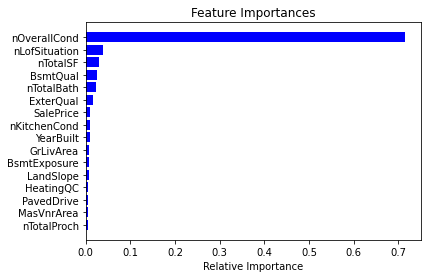

In [663]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 

X = train2.drop(columns=['SalePrice'])
y = train2['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101)

model = RandomForestRegressor(max_depth=6, random_state=101, n_estimators=100)
model.fit(X_train, y_train)

features = train2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-16:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [664]:
fs2.index[1:]  #Updated features to choose

Index(['nTotalPlace', 'nTotalSF', 'GrLivArea', 'nGarageSituation',
       'nTotalBath', 'nOverallCond', 'nHouseAging', 'nKitchenCond',
       'ExterQual', 'BsmtQual'],
      dtype='object')

In [665]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler

X2 = train.loc[:,fs2.index[1:]].values
y2 = train['SalePrice']
X2 = StandardScaler().fit_transform(X2)
X2 = pd.DataFrame(X2)

X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,random_state=101)

mode2 = RandomForestRegressor(max_depth=6, random_state=101, n_estimators=100)
mode2.fit(X2_train, y2_train) 
y2_pred = mode2.predict(X2_test)

result2 = mode2.score(X2_test, y2_test)
print("Accuracy - test set: %.2f%%" % (result2*100.0))

Accuracy - test set: 80.14%


In [666]:
#Try without droping features 
train3=train.drop(columns=['SalePrice_lable','SalePrice_1','SalePrice_2'])
train_corr_3 = train3.corr()['SalePrice']
fs3= train_corr_3[abs(train_corr_3) > 0.62].sort_values(ascending=False)   
print("The top {} features to choose:\n{}".format(len(fs3), fs3))

The top 11 features to choose:
SalePrice           1.000000
nTotalPlace         0.817998
OverallQual         0.794501
nTotalSF            0.786108
GrLivArea           0.732706
GarageCars          0.677545
GarageArea          0.660298
nGarageSituation    0.634619
nTotalBath          0.628431
1stFlrSF            0.627683
nOverallCond        0.621217
Name: SalePrice, dtype: float64


In [667]:
fs3.index[1:] 

Index(['nTotalPlace', 'OverallQual', 'nTotalSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'nGarageSituation', 'nTotalBath', '1stFlrSF',
       'nOverallCond'],
      dtype='object')

In [668]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler

X3 = train.loc[:,fs3.index[1:]].values
y3 = train['SalePrice']
X3 = StandardScaler().fit_transform(X3)
X3 = pd.DataFrame(X3)

X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,random_state=101)

model3 = RandomForestRegressor(max_depth=6, random_state=101, n_estimators=100)
model3.fit(X3_train, y3_train) 
y3_pred = model3.predict(X3_test)

result3 = model3.score(X3_test, y3_test)
print("Accuracy - test set: %.2f%%" % (result3*100.0))

Accuracy - test set: 77.84%


In [669]:
X4 = train[['OverallQual','nTotalSF','FullBath','GrLivArea','GarageCars'
              ,'GarageArea','YearRemodAdd','1stFlrSF','TotRmsAbvGrd','TotalBsmtSF']]
y4 = train['SalePrice']
X4 = StandardScaler().fit_transform(X4)
X4 = pd.DataFrame(X4)

X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y4,random_state=101)

model4 = RandomForestRegressor(max_depth=6,random_state=101, n_estimators=100)
model4.fit(X4_train, y4_train) 
y4_pred = model4.predict(X4_test)

result4 = model4.score(X4_test, y4_test)
print("Accuracy - test set: %.2f%%" % (result4*100.0))

Accuracy - test set: 80.17%


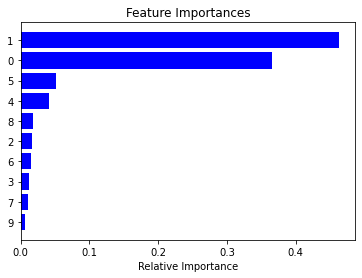

In [670]:
importances = model4.feature_importances_
indices = np.argsort(importances)
features = X4_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [671]:
features = np.around(X4,)
targets  = np.around(train['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split( features , targets,random_state=101)
model = RandomForestRegressor(random_state=101, max_depth=10)
model.fit( X_train , y_train )

RandomForestRegressor(max_depth=10, random_state=101)

In [672]:
print('Accuracy of SalePrice classifier on training set: {:.2f}'
     .format(model.score( X_train ,  y_train )))   
print('Accuracy of SalePrice classifier on test set: {:.2f}'
     .format(model.score(X_test , y_test )))

Accuracy of SalePrice classifier on training set: 0.94
Accuracy of SalePrice classifier on test set: 0.77


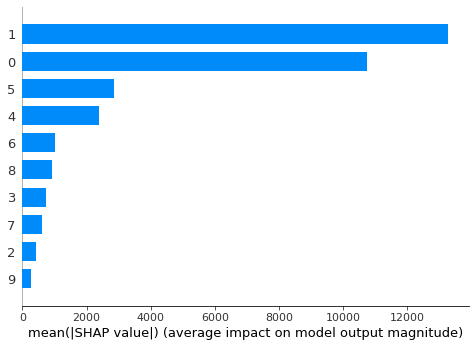

In [673]:
import shap
shap_values = shap.TreeExplainer(model4).shap_values(X4_train)
shap.summary_plot(shap_values, X4_train, plot_type="bar")

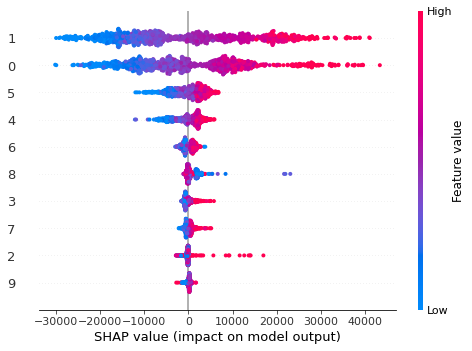

In [674]:
shap.summary_plot(shap_values, X4_train)